In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import os

In [30]:
tweet = pd.read_csv("D:/Projects/khoi-game/ml model/huy-testing/train.csv")
tweet.head(4)

,text,target
0,booted into a lobby and saw my address in the ...,1
1,"After more than 1000 hours, 3 shark cards inve...",0
2,Racing Online is the proof that world peace ca...,1
3,Most milked game ever in human history.,1


In [31]:
tweet.shape

(10001, 2)

In [32]:
np.dtype(tweet)

TypeError: Cannot interpret '                                                    text  target
0      booted into a lobby and saw my address in the ...       1
1      After more than 1000 hours, 3 shark cards inve...       0
2      Racing Online is the proof that world peace ca...       1
3                Most milked game ever in human history.       1
4                  2/3 of my play hours is loading time.       1
...                                                  ...     ...
9996                         Played it a bit, it's okay.       1
9997                                      very nice game       1
9998   I really like this game even if there are modd...       1
9999   Clasico, constantemente se acutaliza. Horas de...       1
10000                                              BEST.       1

[10001 rows x 2 columns]' as a data type

Text(0, 0.5, 'samples')

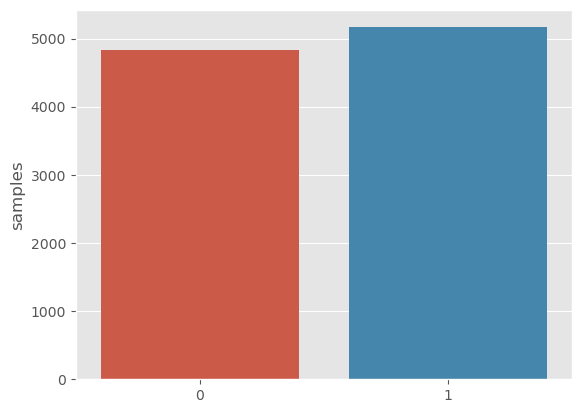

In [9]:
x = tweet.target.value_counts()
sns.barplot(x = x.index, y = x)
plt.gca().set_ylabel('samples')

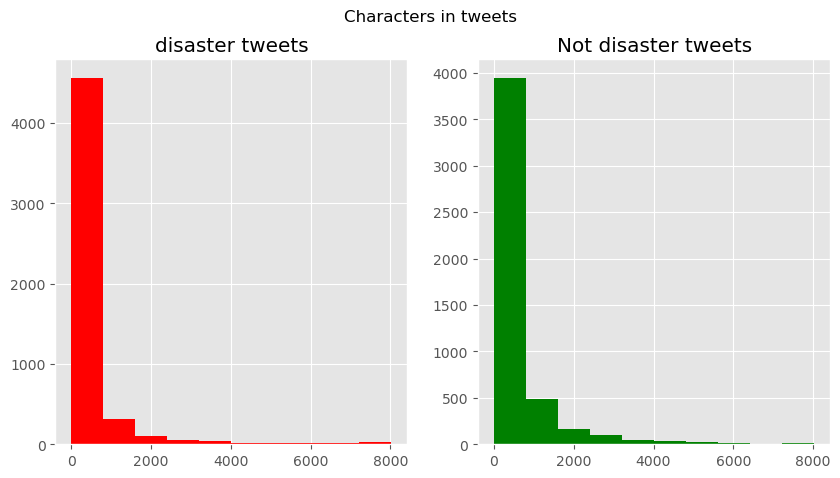

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=tweet[tweet['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=tweet[tweet['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [18]:
def create_corpus(target):
    corpus=[]
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [19]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

<BarContainer object of 10 artists>

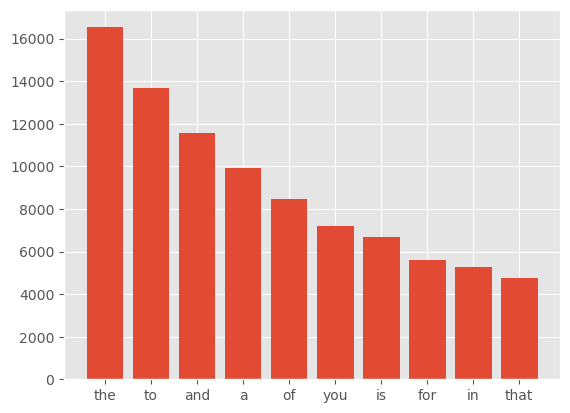

In [20]:
x,y=zip(*top)
plt.bar(x,y)

TypeError: 'float' object is not iterable

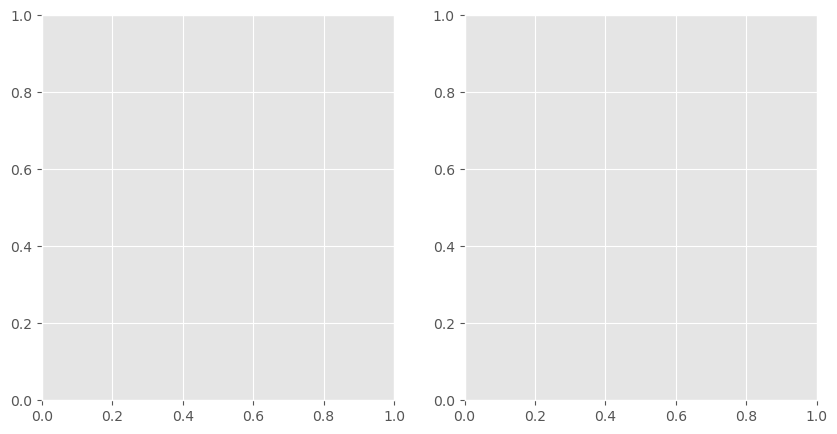

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=tweet[tweet['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=tweet[tweet['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

<BarContainer object of 29 artists>

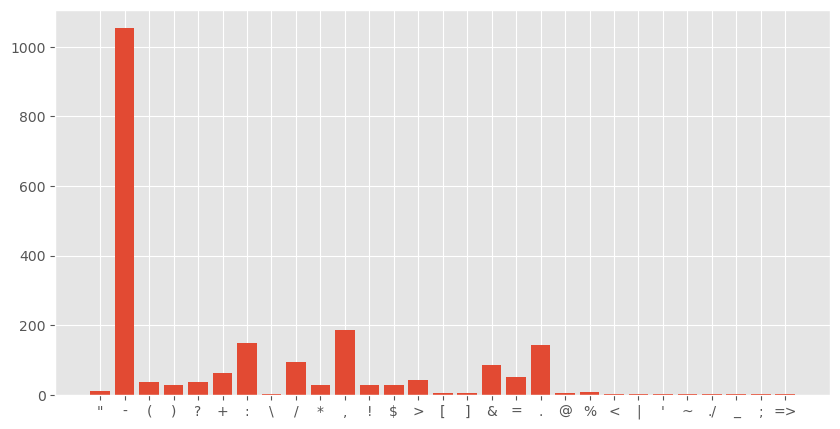

In [35]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

In [36]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

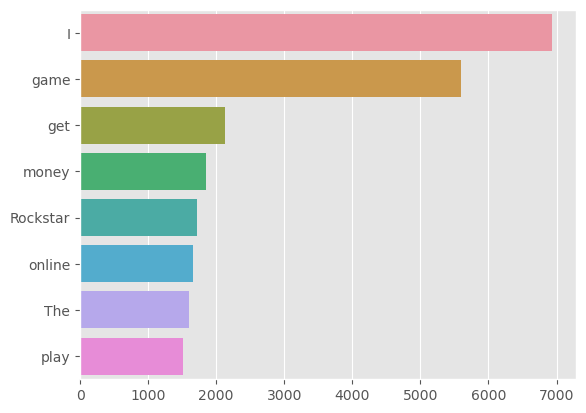

In [37]:
sns.barplot(x=y,y=x)